<a href="https://colab.research.google.com/github/Amitgm/Deep-Learning-for-sentiment-analysis/blob/main/CNN_with_Time_Distributed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Flatten,Dropout
from keras.layers import Activation,Embedding,TimeDistributed,LSTM,GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.convolutional import *
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing import text
from keras.preprocessing import sequence
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
nltk.download('stopwords')
nltk.download('punkt')
from keras.applications.vgg16 import VGG16
from PIL import Image
from numba import jit, cuda
import keras.models

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
img1=np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img2=np.array([0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img3=np.array([0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img4=np.array([0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img5=np.array([0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img6=np.array([0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img7=np.array([0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img8=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img9=np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0])
img10=np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img11=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img12=np.array([0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img13=np.array([0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img14=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img15=np.array([0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img16=np.array([0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img17=np.array([0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img18=np.array([0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img19=np.array([0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img20=np.array([0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img21=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img22=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img23=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img24=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img25=np.array([0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
img26=np.array([0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
img27=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [ ]:
img2=img2.reshape(10,6)
img1=img1.reshape(10,6)
img3=img3.reshape(10,6)
img4=img4.reshape(10,6)
img5=img5.reshape(10,6)
img6=img6.reshape(10,6)
img7=img7.reshape(10,6)
img8=img8.reshape(10,6)
img9=img9.reshape(10,6)
img10=img10.reshape(10,6)
img11=img11.reshape(10,6)
img12=img12.reshape(10,6)
img13=img13.reshape(10,6)
img14=img14.reshape(10,6)
img15=img15.reshape(10,6)
img16=img16.reshape(10,6)
img17=img17.reshape(10,6)
img18=img18.reshape(10,6)
img19=img19.reshape(10,6)
img20=img20.reshape(10,6)
img21=img21.reshape(10,6)
img22=img22.reshape(10,6)
img23=img23.reshape(10,6)
img24=img24.reshape(10,6)
img25=img25.reshape(10,6)
img26=img26.reshape(10,6)
img27=img27.reshape(10,6)

In [ ]:
dict1={'A':img1,'B':img2,'C':img3,'D':img4,'E':img5,'F':img6,'G':img7,'H':img8,'I':img9,'J':img10,'K':img11,'L':img12,'M':img13,'N':img14,'O':img15,'P':img16,'Q':img17,'R':img18,'S':img19,'T':img20,'U':img21,'V':img22,'W':img23,'X':img24,'Y':img25,'Z':img26,' ':img27}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/My Drive/Tweets.csv')

In [ ]:
dataset=dataset[dataset['airline_sentiment']!='neutral']

In [ ]:
dataset=dataset.reset_index()
dataset=dataset[['text','airline_sentiment']]

In [ ]:
dataset.airline_sentiment[dataset.airline_sentiment=='positive'] = 1
dataset.airline_sentiment[dataset.airline_sentiment=='negative'] = 0

In [ ]:
dataset_labels=dataset.airline_sentiment

In [ ]:
dataset=dataset['text']

In [ ]:
dataset

0        @VirginAmerica plus you've added commercials t...
1        @VirginAmerica it's really aggressive to blast...
2        @VirginAmerica and it's a really big bad thing...
3        @VirginAmerica seriously would pay $30 a fligh...
4        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
11536    @AmericanAir my flight was Cancelled Flightled...
11537           @AmericanAir right on cue with the delays👌
11538    @AmericanAir thank you we got on a different f...
11539    @AmericanAir leaving over 20 minutes Late Flig...
11540    @AmericanAir you have my money, you change my ...
Name: text, Length: 11541, dtype: object

In [ ]:
def process(data): 
 text_dataframe=pd.DataFrame()
 text_list=[]
 word_list=[]  
 stop_words=set(stopwords.words("english"))
 for i in tqdm(range(0,len(data))):
    text1=re.sub("@[A-Za-z0-9]+"," ",data[i])
    text1=re.sub("#[A-Za-z0-9]+"," ",text1)
    text1=re.sub("http\S+"," ",text1)
    text1=re.sub("[^A-Za-z]+"," ",text1)
    words=word_tokenize(text1)
    for w in words:
     if w not in stop_words:
           word_list.append(w)
    text1=TreebankWordDetokenizer().detokenize(word_list)
    word_list=[]
    text1=text1.upper()
    text_list.append(text1)    

      


 text_dataframe=text_dataframe.append(text_list)

 return text_dataframe

In [ ]:
def process2(data): 
 text_dataframe=pd.DataFrame()
 text_list=[]
 word_list=[]  
 len1=0
 stop_words=set(stopwords.words("english"))
 for i in tqdm(range(0,len(data))):
    text1=re.sub("@[A-Za-z]+"," ",data[i])
    text1=re.sub("#[A-Za-z]+"," ",text1)
    text1=re.sub("http\S+"," ",text1)
    text1=re.sub("[^A-Za-z]+"," ",text1)
    words=word_tokenize(text1)
    for w in words:
     if w not in stop_words:
           word_list.append(w)
           len1+=1
           if len1==5:
                break;
    text1=TreebankWordDetokenizer().detokenize(word_list)
    len1=0
    word_list=[]
    text1=text1.upper()
    text_list.append(text1)   
    
 text_dataframe=text_dataframe.append(text_list)

 return text_dataframe

In [ ]:
procs_dataset=process(dataset)

100%|██████████| 11541/11541 [00:03<00:00, 3337.90it/s]


In [ ]:
procs_dataset

0
0                PLUS ADDED COMMERCIALS EXPERIENCE TACKY
1      REALLY AGGRESSIVE BLAST OBNOXIOUS ENTERTAINMEN...
2                                   REALLY BIG BAD THING
3      SERIOUSLY WOULD PAY FLIGHT SEATS PLAYING REALL...
4        YES NEARLY EVERY TIME I FLY VX EAR WORM GO AWAY
...                                                  ...
11536  FLIGHT CANCELLED FLIGHTLED LEAVING TOMORROW MO...
11537                                   RIGHT CUE DELAYS
11538                 THANK GOT DIFFERENT FLIGHT CHICAGO
11539  LEAVING MINUTES LATE FLIGHT NO WARNINGS COMMUN...
11540  MONEY CHANGE FLIGHT ANSWER PHONES ANY SUGGESTI...

[11541 rows x 1 columns]

In [ ]:
pro=procs_dataset[0]

In [ ]:
vocab_size=1200
tokenizer=text.Tokenizer(num_words=vocab_size)

In [ ]:
tokenizer.fit_on_texts(pro)

In [ ]:
sequences=tokenizer.texts_to_sequences(pro)

In [ ]:
words=tokenizer.sequences_to_texts(sequences)

In [ ]:
#words[0:10]

In [ ]:
#@title Default title text
len1=0
word_list=[]
text_list=[]
for word in words:
   w=word_tokenize(word)
   for letters in w:
     len1+=1
     word_list.append(letters)
     if len1==5:
       break;
   text1=TreebankWordDetokenizer().detokenize(word_list)
   len1=0
   word_list=[]
   text1=text1.upper()
   text_list.append(text1) 
   print(text_list)
   #text_list.append(text1)
procs_dataset=pd.DataFrame(text_list)   


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
procs_dataset

0
0                            PLUS ADDED EXPERIENCE
1                  REALLY ENTERTAINMENT AMP LITTLE
2                             REALLY BIG BAD THING
3                 SERIOUSLY WOULD PAY FLIGHT SEATS
4                             YES EVERY TIME I FLY
...                                            ...
11536  FLIGHT CANCELLED FLIGHTLED LEAVING TOMORROW
11537                                 RIGHT DELAYS
11538           THANK GOT DIFFERENT FLIGHT CHICAGO
11539               LEAVING MINUTES LATE FLIGHT NO
11540            MONEY CHANGE FLIGHT ANSWER PHONES

[11541 rows x 1 columns]

In [ ]:
#list_word=[]
#for w in word:
 #  list_word.append(w.upper())

In [ ]:
#procs_dataset=pd.DataFrame(list_word)

In [ ]:
joined_data=pd.concat([procs_dataset,dataset_labels],axis=1)

In [ ]:
joined_data.replace('',np.nan,inplace=True)
joined_data.dropna(axis=0,how='any',inplace=True)

In [ ]:
dataset=joined_data[0]

In [ ]:
dataset=pd.DataFrame(dataset)

In [ ]:
dataset_labels=joined_data.iloc[:,1:4]

In [ ]:
dataset_labels

In [ ]:
dataset

In [ ]:
data_train,data_test,label_train,label_test=train_test_split(dataset,dataset_labels,test_size=0.2)

In [ ]:
def convert_to_images_re(dataframe):
 image_dataset=[]
 for j in dataframe[0]:
     list_j=word_tokenize(j)
     for ch in list_j:
         images=[]
         for chs in (ch):
             img=dict1[chs]
             images.append(img)
                
         image_list=np.concatenate(images,axis=1)
         image_dataset.append(image_list)
     if len(list_j)<5:
      for i in range(len(list_j),5):
            image_dataset.append(dict1[' '])
         
 return image_dataset        


df1=convert_to_images_re(data_train)

In [ ]:
df2=convert_to_images_re(data_test)

In [ ]:
data_train

In [ ]:
plt.imshow(df1[5])

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(df1[3])
len(df1[1][-1])

In [ ]:
max_len=26
list2=[]
for i in range(0,len(df1)):
    print(i)
    im_length=int(len(df1[i][-1])/6)
    for j in range(im_length,max_len):
        list2.append(dict1[' '])
    list2=np.concatenate(list2,axis=1)
    df1[i]=np.concatenate((df1[i],list2),axis=1)
    list2=[]

In [ ]:
max_len=26
list3=[]
for i in range(0,len(df2)):
    print(i)
    im_length=int(len(df2[i][-1])/6)
    for j in range(im_length,max_len):
        list3.append(dict1[' '])
    list3=np.concatenate(list3,axis=1)
    df2[i]=np.concatenate((df2[i],list3),axis=1)
    list3=[]

In [ ]:
model=Sequential()
model.add(TimeDistributed(Conv2D(32, (3,3), 
            padding='same', strides=(2,2), activation='relu'),
        input_shape = (5, 10, 156, 1)))
model.add(TimeDistributed(Conv2D(64, (3,3), 
            padding='same', strides=(2,2), activation='relu')))
model.add(TimeDistributed(Conv2D(128, (3,3), 
            padding='same', strides=(2,2), activation='relu')))


model.add(
    TimeDistributed(
        GlobalAveragePooling2D() # Or Flatten()
    ))
model.add(LSTM(1024,activation='relu',return_sequences=False))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model2=Sequential()
model2.add(TimeDistributed(Conv2D(32, (3,3), 
            padding='same', strides=(2,2), activation='relu'),
        input_shape = (5, 10, 156, 1)))
model2.add(TimeDistributed(Conv2D(64, (3,3), 
            padding='same', strides=(2,2), activation='relu')))
model2.add(TimeDistributed(Conv2D(128, (3,3), 
            padding='same', strides=(1,1), activation='relu')))
model2.add(TimeDistributed(MaxPooling2D((2,2),strides=(2,2))))
model2.add(Flatten())
model2.add(Dense(1054,activation='relu'))
model2.add(Dense(1,activation='softmax'))

In [ ]:
model.compile('adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
dfs=np.array(df1)

In [ ]:
dfs.shape

In [ ]:
dfs=dfs.reshape(-1,10,156,1)

In [ ]:
dfs=dfs.reshape(-1,5,10,156,1)

In [ ]:
dfs.shape

In [ ]:
  from sklearn.metrics import confusion_matrix
  import itertools

In [ ]:
model.fit(dfs,label_train,validation_split=0.2,batch_size=100,epochs=40)

Train on 7353 samples, validate on 1839 samples
Epoch 1/40
7353/7353 [==============================] - 9s 1ms/step - loss: 0.5046 - accuracy: 0.7970 - val_loss: 0.4882 - val_accuracy: 0.7890
Epoch 2/40
7353/7353 [==============================] - 3s 343us/step - loss: 0.4734 - accuracy: 0.7993 - val_loss: 0.4819 - val_accuracy: 0.7890
Epoch 3/40
7353/7353 [==============================] - 3s 341us/step - loss: 0.4552 - accuracy: 0.8154 - val_loss: 0.4394 - val_accuracy: 0.8146
Epoch 4/40
7353/7353 [==============================] - 3s 345us/step - loss: 0.4069 - accuracy: 0.8391 - val_loss: 0.4277 - val_accuracy: 0.8363
Epoch 5/40
7353/7353 [==============================] - 2s 338us/step - loss: 0.3811 - accuracy: 0.8505 - val_loss: 0.3951 - val_accuracy: 0.8374
Epoch 6/40
7353/7353 [==============================] - 2s 337us/step - loss: 0.3709 - accuracy: 0.8534 - val_loss: 0.3844 - val_accuracy: 0.8461
Epoch 7/40
7353/7353 [==============================] - 2s 334us/step - loss: 

In [ ]:
dfs2=np.array(df2)

In [ ]:
dfs2.shape

In [ ]:
dfs2=dfs2.reshape(-1, 10, 156,1)

In [ ]:
dfs2=dfs2.reshape(-1,5,10,156,1)

In [ ]:
dfs2.shape

(2298, 5, 10, 156, 1)

In [ ]:
predictions=model.predict(dfs2)

In [ ]:
predictions

In [ ]:
for i in range(0,len(predictions)):
   if predictions[i]>0.5:
     predictions[i]=1
   else:
     predictions[i]=0
  

In [ ]:
results=model.evaluate(dfs2,label_test)

2298/2298 [==============================] - 0s 130us/step


In [ ]:
results

[0.3812267705733305, 0.855091392993927]

In [ ]:
  from sklearn.metrics import confusion_matrix
  import itertools

In [ ]:
label_test

In [ ]:
label_test_array=np.array(label_test)

In [ ]:
label_test_array

In [ ]:
label_test_array(np.array(label_test))

In [ ]:
label_test

In [ ]:
label_test_array

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
for i in predictions:
  print(i)

In [ ]:
cm = confusion_matrix(label_test_array,predictions)

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion_matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('normalized confusion matrix')
    else:
        print('confusion matrix,without normalization')
    print(cm)
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j], 
                 horizontalalignment="center",
                 color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('true_label')
    plt.xlabel('predicted_label')

confusion matrix,without normalization
[[1654  162]
 [ 171  311]]


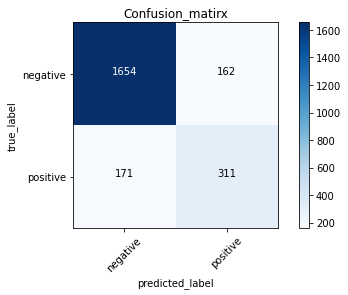

In [ ]:
cm_plot_labels=['negative','positive']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matirx')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_test_array,predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1816
           1       0.66      0.65      0.65       482

    accuracy                           0.86      2298
   macro avg       0.78      0.78      0.78      2298
weighted avg       0.85      0.86      0.85      2298

